## Dataset Description

In [1]:
# This dataset contains a large number of segmented nuclei images. 
# The images were acquired under a variety of conditions and vary in the cell type, magnification, and imaging modality 
# (brightfield vs. fluorescence). 
# The dataset is designed to challenge an algorithm's ability to generalize across these variations.

# Each image is represented by an associated ImageId. Files belonging to an image are contained in a folder with this ImageId.
# Within this folder are two subfolders:

# images contains the image file.
# masks contains the segmented masks of each nucleus. 
# This folder is only included in the training set. 
# Each mask contains one nucleus. Masks are not allowed to overlap (no pixel belongs to two masks).
# The second stage dataset will contain images from unseen experimental conditions. 
# To deter hand labeling, it will also contain images that are ignored in scoring. 
# The metric used to score this competition requires that your submissions are in run-length encoded format.
# Please see the evaluation page for details.

# As with any human-annotated dataset, you may find various forms of errors in the data. 
# You may manually correct errors you find in the training set. 
# The dataset will not be updated/re-released unless it is determined that there are a large number of systematic errors.
# The masks of the stage 1 test set will be released with the release of the stage 2 test set.

# https://www.kaggle.com/c/data-science-bowl-2018/data
    

In [2]:
import os
import sys
import random
import warnings

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from tqdm import tqdm
from itertools import chain
from skimage.io import imread, imshow, imread_collection, concatenate_images
from skimage.transform import resize
from skimage.morphology import label

# Set some parameters
IMG_WIDTH = 128
IMG_HEIGHT = 128
IMG_CHANNELS = 3
#TRAIN_PATH = '../input/stage1_train/'
#TEST_PATH = '../input/stage1_test/'

TRAIN_PATH = 'data/train/'
TEST_PATH = 'data/test/'

dir_path = 'D:\\1A work\\jupyter/udac\\1_semantic_seg\\Kaggle_seg\\semantic\\'

warnings.filterwarnings('ignore', category=UserWarning, module='skimage')
seed = 42
random.seed = seed
np.random.seed = seed

In [3]:
TRAIN_PATH

'data/train/'

In [4]:
TEST_PATH

'data/test/'

In [5]:
train_ids = next(os.walk(TRAIN_PATH))[1]
test_ids = next(os.walk(TEST_PATH))[1]

In [6]:
X_train = np.zeros((len(train_ids), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
Y_train = np.zeros((len(train_ids), IMG_HEIGHT, IMG_WIDTH, 1), dtype=np.bool)
 

In [7]:
X_test = np.zeros((len(test_ids), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
 

## Training image and label acquisation

In [8]:
sys.stdout.flush()
for n, id_ in tqdm(enumerate(train_ids), total=len(train_ids)):
    
    #Read image files iteratively
    path = TRAIN_PATH + id_
    img = imread(dir_path + path + '/images/' + id_ + '.png')[:,:,:IMG_CHANNELS]
    img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
    
    #Append image to numpy array for train dataset
    X_train[n] = img
    
    #Read corresponding mask files iteratively
    mask = np.zeros((IMG_HEIGHT, IMG_WIDTH, 1), dtype=np.bool)
    
    #Looping through masks
    for mask_file in next(os.walk(path + '/masks/'))[2]:
        
        #Read individual masks
        mask_ = imread(dir_path + path + '/masks/' + mask_file)
        
        #Expand individual mask dimensions
        mask_ = np.expand_dims(resize(mask_, (IMG_HEIGHT, IMG_WIDTH), mode='constant', 
                                      preserve_range=True), axis=-1)
        
        #Overlay individual masks to create a final mask for corresponding image
        mask = np.maximum(mask, mask_)
    
    #Append mask to numpy array for train dataset
    Y_train[n] = mask



100%|████████████████████████████████████████████████████████████████████████████████| 670/670 [04:05<00:00,  2.72it/s]


## Testing image acquisation

In [9]:
# Get and resize test images
 
sizes_test = []
print('Getting and resizing test images ... ')
sys.stdout.flush()
for n, id_ in tqdm(enumerate(test_ids), total=len(test_ids)):
    path = TEST_PATH + id_
    
    #Read images iteratively
    img = imread(dir_path + path + '/images/' + id_ + '.png')[:,:,:IMG_CHANNELS]
    
    #Get test size
    sizes_test.append([img.shape[0], img.shape[1]])
    
    #Resize image to match training data
    img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
    
    #Append image to numpy array for test dataset
    X_test[n] = img

print('Done!')

Getting and resizing test images ... 


100%|██████████████████████████████████████████████████████████████████████████████████| 65/65 [00:01<00:00, 53.72it/s]

Done!


In [10]:
X_train.shape

(670, 128, 128, 3)

In [11]:
np.save('D:/1A work/jupyter/udac/1_semantic_seg/Kaggle_seg/semantic/train_im.npy' ,X_train)

In [12]:
X_test.shape

(65, 128, 128, 3)

In [13]:
np.save('D:/1A work/jupyter/udac/1_semantic_seg/Kaggle_seg/semantic/test_im.npy' ,X_test)

In [14]:
Y_train.shape

(670, 128, 128, 1)

In [15]:
Y_train=np.squeeze(Y_train)
Y_train.shape

(670, 128, 128)

In [22]:
l= Y_train

In [26]:
l.astype(int)
np.save('D:/1A work/jupyter/udac/1_semantic_seg/Kaggle_seg/semantic/train_lb.npy' ,l)

In [28]:
a=np.load('train_im.npy') 
b=np.load('train_lb.npy') 
c=np.load('test_im.npy') 

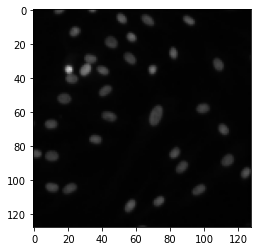

In [32]:
plt.imshow(a[1])

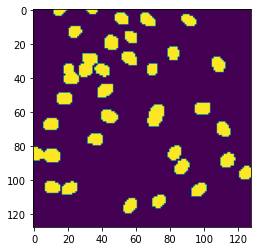

In [33]:
plt.imshow(b[1])

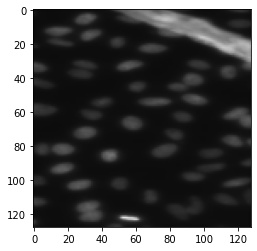

In [34]:
plt.imshow(c[1])